#                       Esercitazione 4 - 12 Marzo 2023

Esplorate le caratteristiche dell'insieme dei numeri di macchina F($\beta$,t,L,U) sul vostro calcolatore utilizzando il comando sys.float_info, dopo aver importato im modulo sys:

import sys

print(sys.float_info)

In [1]:
import sys
print(sys.float_info)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


min_exp=-1021   (L=-1021-1=-1022)

max_exp=1024    (U=1024-1=1023)

mant_dig=53 (incluso l'hidden bit)

dig=15, significa che i numeri "float" vengono convertiti in stringhe con un massimo di 15 cifre decimali. Le cifre decimali oltre la quindicesima vengono eliminate (troncate). (solo a livello di stringa visualizzata)

- **1.**  Calcolare lo spacing in  $[2^{52}, 2^{53}]$.
    - Sia $x=2^{52}$ individuare il numero successivo a $2^{52}$ ed assegnarlo ad una variabile  y.
    - Cosa succede se consideriamo il valore z=x+0.5?
    - Cosa succede se consideriamo il valore q=y+0.5?
  

In [6]:
# Dimensioni dell'insieme dei numeri Floating Point:
beta = 2.0
p = 52
t = 53

# Calcolo dello spacing:
s = beta**(p+1-t)
print("Lo spacing vale: ", s)

# Testing:
## 1:
x = 2.0**52
y = x + 5
print("x = ", x)
print("y = ", y)

## 2:
### (se ad un numero sommiamo un valore che è più piccolo dello spacing, il valore non sente variazioni, non viene toccato)
z = x + 0.5            # --> 0.5 minore dello spacing (s = 1.0)
print("z = ",z)

## 3:
### (in questo caso il risultato è tale a causa del rounding to even, come approssimazione)
q = y + 0.5
print("q = ",q)


Lo spacing vale:  1.0
x =  4503599627370496.0
y =  4503599627370501.0
z =  4503599627370496.0
q =  4503599627370502.0


- **2** Calcolare la cardinalità dell'insieme dei numeri finiti di Python

In [11]:
beta = 2
t = 53
L = sys.float_info.min_exp
U = sys.float_info.max_exp 
CardF = (2*(beta-1)*(beta**(t-1))*(U-L+1)) + 1
print("Cardinalità di F = ",CardF)


Cardinalità di F =  18428729675200069633


- **3**  Verificare numericamente che $\texttt{eps} = 2^{-52}$, spacing nell'intervallo $[1, 2]$,
è il piu' piccolo $x$ tale che $fl(1 + x)$ è  diverso da $1$. 


In [18]:
p = 0
s = beta**(p+1-t)
print("Spacing in [1,2]",s)
print("Eps = ", 2**(-52))
y = 1+s                         # --> sto prendendo il valore macchina successivo all'estremo inferiore (1)
print("y = ",y)
y1 = 1+s/2                      # --> provo a prendere il valore ottenuto sommando l'estremo inferiore (1) con la metà dello spacing
print("y1 = ",y1)

# Essendo y1 uguale a zero, ho dimostrato che eps è il minimo x affinchè, fl(1+x) != 1   -->   perchè con x = eps/2, fl(...) = 1

Spacing in [1,2] 2.220446049250313e-16
Eps =  2.220446049250313e-16
y =  1.0000000000000002
y1 =  1.0


- **4** Costruire un numpy array costituito da n=10 valori tutti uguali a 0.1
-     Effettuate la somma utilizzando un ciclo for.
-     Effettuate la somma effettuando la somma con la funzione sum del modulo numpy.
  Cosa osservate? Cercate di giustificare i risultati 

In [23]:
import numpy as np
array = np.full(10, 0.1)
print("Array generato: ", array)

# Effettuo la somma:
## Utilizzando il ciclo for:
somma = 0
for val in array:
    somma = somma + val
print("La somma ottenuta mediante il ciclo for vale: ", somma)

## Utilizzando la funzione sum di numpy:
somma = np.sum(array)
print("La somma ottenuta mediante la funzione sum di numpy vale: ", somma)


# SPIEGAZIONE DEL RISULTATO ERRATO OTTENUTO:
## Il calcolatore non lavora in base 10, ma in base 2, quindi bisogna scoprire come si rappresenta il valore 0.1 in base 2
# SISTEMA DELLE MOLTIPLICAZIONI SUCCESSIVE:
## Si riprende la parte decimale che viene fuori dal calcolo
## 0.1 * 2 = 0.2 --> valore * base
## 0.2 * 2 = 0.4
## 0.4 * 2 = 0.8
## 0.8 * 2 = 1.6
## 0.6 * 2 = 1.2
## 0.2 * 2 = 0.4
## ... via via si ripete, segue un pattern preciso ...
## Rappresenta il numero in base 2 --> 0.0001100110011001100...
## Per troncamenti e arrotondamenti, la somma darà ogni tanto dei valori leggermente sballato.

Array generato:  [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
La somma ottenuta mediante il ciclo for vale:  0.9999999999999999
La somma ottenuta mediante la funzione sum di numpy vale:  1.0


- **5.** Siano $a=1.234567890123400 e+15$, $b=-1.234567890123401 e+15$, $c=0.06$. 
  Calcolare $(a+b)+c$, $(a+c)+b$, $a+(b+c)$. Che cosa si osserva? Ripetere l'esercizio con $a=0.23371258 e-4$, $b=0.33678429 e+2$, $c=-0.33677911 e+2$.

In [29]:
# Test 1:
## a e b sono valori che in modulo sono molto vicini l'uno all'altro, ma sono di segno opposto (quindi causano un grosso aumento dei FATTORI DI AMPLIFICAZIONE)
## per le altre coppie di associazioni che si possono fare invece il problema non si pone, perchè sono valori distanti in modulo
a = 1.234567890123400e+15   # --> compreso nell'intervallo 2^50 e 2^51, dove lo spacing vale 0.25 (quindi se sommo qualcosa di più piccolo, il risultato non viene influenzato)
b = -1.234567890123401e+15
c = 0.06                    # --> non ha effetto se lo sommo ad a o a b, perchè superiore allo spacing
ab = (𝑎+𝑏)+𝑐
ac = (𝑎+𝑐)+𝑏
bc = a+(b+c)
print("Valore delle tre operazioni:")
print("(𝑎+𝑏)+𝑐 = ", ab)     # --> risultato più giusto
print("(𝑎+c)+b = ", ac)     # --> è come fare a+b
print("a+(b+c) = ", bc)     # --> è come fare a+b

# Test 2:
## b e c sono valori che in modulo sono molto vicini l'uno all'altro, ma sono di segno opposto (quindi causano un grosso aumento dei FATTORI DI AMPLIFICAZIONE)
## per le altre coppie di associazioni che si possono fare invece il problema non si pone, perchè sono valori distanti in modulo
a = 0.23371258e-4
b = 0.33678429e+2
c = -0.33677911e+2
ab = (𝑎+𝑏)+𝑐
ac = (𝑎+𝑐)+𝑏
bc = a+(b+c)
print("Valore delle tre operazioni:")
print("(𝑎+𝑏)+𝑐 = ", ab)     # --> è come fare b+c
print("(𝑎+c)+b = ", ac)     # --> è come fare b+c
print("a+(b+c) = ", bc)     # --> risultato più giusto

Valore delle tre operazioni:
(𝑎+𝑏)+𝑐 =  -0.94
(𝑎+c)+b =  -1.0
a+(b+c) =  -1.0
Valore delle tre operazioni:
(𝑎+𝑏)+𝑐 =  0.0005413712580022434
(𝑎+c)+b =  0.0005413712580022434
a+(b+c) =  0.0005413712579995743


- **6.** Si considerino le espressioni $y_1=\sqrt{x^2+1}-x$ e $y_2=\frac{1}{\sqrt{x^2+1}+x}$. Calcolare il valore di $y_1$ e $y_2$ per $x=7777$ e $x=77777777$. Che cosa si osserva? Commentare i risultati ottenuti.

In [41]:
# L'operazione di sottrazione è un'operazione pericolosa per alcuni valori di x !!!
# y2 rappresenta la funzione y1, senza che sia pericolosa per l'operazioe differenza
## y2 è la funzione safe (reale, per modo di dire)
## y1 è la funzione macchina con gli errori

## Definizione delle funzioni da richiamare:
### math.sqrt() genera degli errori di cancellazione
radix = lambda x: np.sqrt(x**2+1)

# TEST 1:
x = 7777
y1 = radix(x)-x
y2 = 1/(radix(x)+x)
print("y1 = ", y1)
print("y2 = ", y2)
print("Errore relativo = ", 100*abs((y2 - y1)/y2), "%")

# TEST 2:
x = 77777777
y1 = radix(x)-x
y2 = 1/(radix(x)+x)
print("y1 = ", y1)
print("y2 = ", y2)
print("Errore relativo = ", 100*abs((y2 - y1)/y2), "%")

y1 =  6.429214317904552e-05
y2 =  6.429214323431402e-05
Errore relativo =  8.596461472920769e-08 %
y1 =  0.0
y2 =  6.428571492857143e-09
Errore relativo =  100.0 %


- **7.** Valutare in aritmetica floating point l'espressione
$$A(x)=\frac{1}{x}-\frac{1}{(x+1)}$$  nel vettore   $x=[10^0, 10^1,... ,10^{20}]$ contenente potenze successive  di $10$,  Si calcoli per ogni elemento di x l'errore relativo considerando come valore esatto quello calcolato usando  l'espressione algebricamente equivalente
$$
B(x)=\frac{1}{x (x+1)}.
$$ Si visualizzi l'errore relativo in un grafico in scala logaritmica su $x$ e $y$

Array di partenza:  [1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09
 1.e+10 1.e+11 1.e+12 1.e+13 1.e+14 1.e+15 1.e+16 1.e+17 1.e+18 1.e+19
 1.e+20]
yA =  [5.00000000e-01 9.09090909e-03 9.90099010e-05 9.99000999e-07
 9.99900010e-09 9.99990000e-11 9.99999000e-13 9.99999899e-15
 1.00000000e-16 1.00000015e-18 1.00000061e-20 9.99999968e-23
 1.00004844e-24 1.00090672e-26 9.93964741e-29 9.86076132e-31
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
yB =  [5.00000000e-01 9.09090909e-03 9.90099010e-05 9.99000999e-07
 9.99900010e-09 9.99990000e-11 9.99999000e-13 9.99999900e-15
 9.99999990e-17 9.99999999e-19 1.00000000e-20 1.00000000e-22
 1.00000000e-24 1.00000000e-26 1.00000000e-28 1.00000000e-30
 1.00000000e-32 1.00000000e-34 1.00000000e-36 1.00000000e-38
 1.00000000e-40]
spacing:  [2.22044605e-16 1.77635684e-15 1.42108547e-14 1.13686838e-13
 1.81898940e-12 1.45519152e-11 1.16415322e-10 1.86264515e-09
 1.49011612e-08 1.19209290e-07 1.90734863

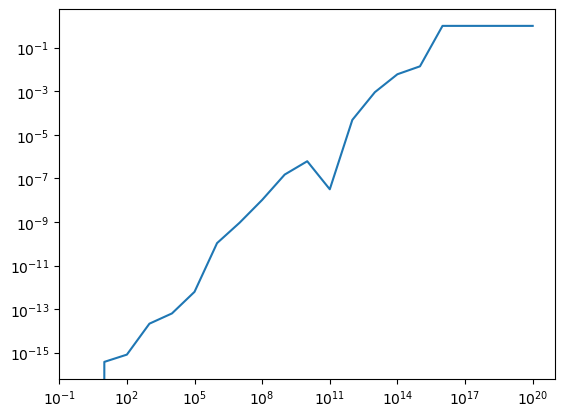

Si nota che dopo il 10^16 l'errore è del 100%


In [51]:
# NON FARE DEI CICLI PER RIEMPIRE IL VETTORE, ma utilizzare il metodo arange di numpy:
x = 10.0**np.arange(21)      # --> in python gli int sono di 32 bit, quindi sarebbe andato in overflow, quindi utilizzare 10.0 che viene considerato float
print("Array di partenza: ", x)

# Definizioni delle lambda function:
A = lambda x: (1/x)-(1/(x+1))
B = lambda x: (1/(x*(x+1)))

# Utilizzo delle funzioni per il calcolo dei risultati:
yA = A(x)
yB = B(x)
print("yA = ",yA)
print("yB = ",yB)

# Come calcolare lo spacing dei vari valori di x:
print("spacing: ", np.spacing(x))

# Calcolo dell'errore relativo:
Errore_relativo = np.abs(yA - yB)/np.abs(yB)
print("Errore relativo: ", Errore_relativo)

# Generazione dei grafici:
import matplotlib.pyplot as plt
plt.loglog(x, Errore_relativo)   # --> tramite loglog genero un grafico in scala logaritmica
plt.show()
print("Si nota che dopo il 10^16 l'errore è del 100%")

## Quando x passa al valore 10^16, lo spacing ha un valore che è maggiore di 1, quindi il risultato della funzione mi da 0
## in quanto sto sommando 1, che è minore dello spacing (quindi non ha alcun effetto sul valore a cui viene sommato)

- **8-**  Risolvere l'equazione $x^2+10^k x+1=0$ con k in range(1,9). 

- Scrivere un codice Python che calcola le due radici: x1=(-b+sqrt(Delta))/2  e x2=(-b-sqrt(Delta))/2, dove Delta=b^2-4ac,  per tutti i valori di k in range(1,9)

- Calcolare l'errore relativo della soluzione numerica x1 rispetto alla soluzione in aritmetica reale, che per valori di k alti è  uguale a $10^{-k}$, altrimenti è una sua approssimazione. 

- Visualizzare l'errore relativo per ogni valore di k.

- Proporre un algoritmo aleternativo per il calcolo di una delle due soluzioni, che fornisca errore relativo inferiore.

- **9.** Scrivere uno script Matlab che fornisca le approssimazioni di $e=\exp(1)$ ottenute con la formula
$f(n)=(1/n+1)^n$ per $n=10^k$ e  $k=0, ..., 16$. 

Visualizzare  un grafico con i valori di $f(n)$ al variare di n ed un grafico con i valori dell'errore relativo (considerando come valore esatto il valore math.exp(1)).  Cosa si osserva? Commentare i risultati ottenuti.